# Exercise 2-2: Write your own code for the NSF Awards Notebook

In [2]:
import pandas as pd

data_dir = '../../data'

## Get the long and wide DataFrames

In [3]:
awards_summary_df = pd.read_pickle(f'{data_dir}/pkl_files/awards_summary_df.pkl')

In [40]:
awards_wide_df = pd.read_pickle(f'{data_dir}/pkl_files/awards_wide.pkl')

## Work with the long DataFrame

In [5]:
awards_summary_df.head()

,awd_year,div_abbr,awd_count,sum_awd_amount
0,2008,BCS,2,440193.0
1,2008,CMMI,1,300000.0
2,2008,CNS,1,44956.0
3,2008,DMR,1,113753.0
4,2008,EAR,1,64257.0


In [8]:
awards_summary_df.columns = awards_summary_df.columns.str.replace('awd_year','Year')
awards_summary_df.head()

,Year,div_abbr,awd_count,sum_awd_amount
0,2008,BCS,2,440193.0
1,2008,CMMI,1,300000.0
2,2008,CNS,1,44956.0
3,2008,DMR,1,113753.0
4,2008,EAR,1,64257.0


In [9]:
awards_summary_df[['Year','div_abbr','awd_count']].head()

,Year,div_abbr,awd_count
0,2008,BCS,2
1,2008,CMMI,1
2,2008,CNS,1
3,2008,DMR,1
4,2008,EAR,1


In [10]:
awards_summary_df.query('Year >= 2019 and Year <= 2021').tail(6)

,Year,div_abbr,awd_count,sum_awd_amount
604,2021,PHY,350,252777440.0
605,2021,RIO,1,150000.0
606,2021,RISE,185,145509497.0
607,2021,SES,359,154685882.0
608,2021,SMA,103,22654433.0
609,2021,TI,864,291114702.0


In [11]:
awards_summary_df.query('div_abbr == "PHY"')[['Year','awd_count','sum_awd_amount']].head()

,Year,awd_count,sum_awd_amount
38,2009,2,42631956.0
86,2010,388,198223747.0
133,2011,307,366674218.0
179,2012,410,337907705.0
223,2013,320,143733069.0


In [ ]:
# NOTE: the max_rows and max_columns options affect different IDEs in different ways
# and may not work in all IDEs -- YMMV
with pd.option_context(
    'display.max_rows', 6,
    'display.max_columns', None):
    display(awards_summary_df.sort_values('sum_awd_amount', ascending=False))

,Year,div_abbr,awd_count,sum_awd_amount
455,2018,OCE,478,1.074471e+09
422,2018,AGS,256,9.755158e+08
324,2016,AST,238,9.324632e+08
266,2014,OCE,395,8.281515e+08
9,2009,AST,15,7.627715e+08
576,2021,DGE,190,7.190213e+08
103,2011,DGE,117,7.141868e+08
...,...,...,...,...
355,2016,IRM,1,4.510000e+03
369,2016,RIO,1,4.050000e+03


In [19]:
awards_summary_df['sum_awd_amount'].median()

116578566.0

In [41]:
awards_summary_df.groupby('Year')[['sum_awd_amount','awd_count']].sum()

,sum_awd_amount,awd_count
Year,,
2008,1.564618e+06,9
2009,1.247244e+09,446
2010,7.348607e+09,13483
2011,6.681014e+09,11952
2012,6.216919e+09,12306
2013,5.817465e+09,11702
2014,6.779716e+09,11983
2015,5.993928e+09,12926
2016,7.502802e+09,12991


## Work with the wide DataFrame

In [43]:
awards_wide_df.head()

,awd_year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
0,2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,...,13.0,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0
2,2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,...,288.0,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0
3,2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,...,308.0,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0
4,2012,333.0,NaN,187.0,536.0,NaN,1.0,661.0,448.0,531.0,...,318.0,NaN,410.0,NaN,16.0,NaN,450.0,63.0,NaN,510.0


In [44]:
awards_wide_df.columns = awards_wide_df.columns.str.replace('awd_year','Year')
awards_wide_df.head()

,Year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
0,2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,...,13.0,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0
2,2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,...,288.0,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0
3,2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,...,308.0,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0
4,2012,333.0,NaN,187.0,536.0,NaN,1.0,661.0,448.0,531.0,...,318.0,NaN,410.0,NaN,16.0,NaN,450.0,63.0,NaN,510.0


In [45]:
awards_wide_df.index

RangeIndex(start=0, stop=19, step=1)

In [46]:
awards_wide_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,19.0,2017.000000,5.627314,2008.0,2012.50,2017.0,2021.50,2026.0
AGS,17.0,285.294118,93.857448,17.0,294.00,307.0,333.00,381.0
ARC,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0
AST,17.0,195.000000,67.160256,15.0,192.00,217.0,230.00,240.0
BCS,18.0,412.333333,176.649870,2.0,430.50,472.0,506.50,632.0
...,...,...,...,...,...,...,...,...
SBE,3.0,6.666667,9.814955,1.0,1.00,1.0,9.50,18.0
SES,17.0,375.294118,145.888984,18.0,316.00,406.0,450.00,597.0
SMA,16.0,84.750000,30.312814,6.0,77.25,86.5,103.25,139.0
TF,2.0,7.500000,0.707107,7.0,7.25,7.5,7.75,8.0


In [47]:
awards_wide_df[['Year', 'BIO', 'CHE', 'GEO', 'PHY']]

,Year,BIO,CHE,GEO,PHY
0,2008,NaN,NaN,NaN,NaN
1,2009,NaN,18.0,NaN,2.0
2,2010,NaN,603.0,65.0,388.0
3,2011,NaN,459.0,36.0,307.0
4,2012,1.0,531.0,44.0,410.0
5,2013,NaN,479.0,NaN,320.0
6,2014,NaN,486.0,3.0,339.0
7,2015,NaN,547.0,NaN,409.0
8,2016,NaN,504.0,NaN,349.0
9,2017,1.0,497.0,NaN,328.0


In [48]:
awards_wide_df.query('Year >= 2016 and Year <= 2022').head(10)

,Year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OPP,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI
8,2016,324.0,NaN,238.0,509.0,1.0,NaN,636.0,479.0,504.0,...,290.0,6.0,349.0,1.0,103.0,NaN,417.0,110.0,NaN,967.0
9,2017,341.0,NaN,191.0,505.0,7.0,1.0,658.0,448.0,497.0,...,222.0,4.0,328.0,NaN,105.0,NaN,438.0,139.0,NaN,596.0
10,2018,256.0,NaN,213.0,507.0,7.0,NaN,660.0,484.0,563.0,...,242.0,NaN,396.0,1.0,61.0,NaN,391.0,82.0,NaN,716.0
11,2019,309.0,NaN,220.0,432.0,7.0,NaN,612.0,506.0,518.0,...,186.0,31.0,303.0,3.0,205.0,NaN,382.0,83.0,NaN,792.0
12,2020,294.0,NaN,237.0,504.0,10.0,NaN,651.0,519.0,531.0,...,205.0,12.0,343.0,NaN,158.0,NaN,510.0,85.0,NaN,817.0
13,2021,307.0,NaN,231.0,456.0,9.0,NaN,532.0,405.0,539.0,...,250.0,14.0,350.0,1.0,185.0,NaN,359.0,103.0,NaN,864.0
14,2022,301.0,NaN,230.0,435.0,12.0,NaN,606.0,461.0,579.0,...,216.0,13.0,364.0,NaN,101.0,NaN,316.0,84.0,NaN,729.0


In [49]:
awards_wide_df.query('Year >= 2016 and Year <= 2022')[['Year','BIO','PHY']].head(10)

,Year,BIO,PHY
8,2016,NaN,349.0
9,2017,1.0,328.0
10,2018,NaN,396.0
11,2019,NaN,303.0
12,2020,NaN,343.0
13,2021,NaN,350.0
14,2022,NaN,364.0


In [50]:
awards_wide_df.groupby('Year').agg(['mean','median','sum'])

AGS                ARC                AST                  BCS  ...  \
       mean median    sum mean median  sum   mean median    sum   mean  ...   
Year                                                                    ...   
2008    NaN    NaN    0.0  NaN    NaN  0.0    NaN    NaN    0.0    2.0  ...   
2009   17.0   17.0   17.0  NaN    NaN  0.0   15.0   15.0   15.0   18.0  ...   
2010  348.0  348.0  348.0  NaN    NaN  0.0  226.0  226.0  226.0  632.0  ...   
2011  381.0  381.0  381.0  NaN    NaN  0.0  211.0  211.0  211.0  481.0  ...   
2012  333.0  333.0  333.0  NaN    NaN  0.0  187.0  187.0  187.0  536.0  ...   
2013  307.0  307.0  307.0  2.0    2.0  2.0  192.0  192.0  192.0  466.0  ...   
2014  293.0  293.0  293.0  1.0    1.0  1.0  210.0  210.0  210.0  478.0  ...   
2015  344.0  344.0  344.0  NaN    NaN  0.0  217.0  217.0  217.0  536.0  ...   
2016  324.0  324.0  324.0  NaN    NaN  0.0  238.0  238.0  238.0  509.0  ...   
2017  341.0  341.0  341.0  NaN    NaN  0.0  191.0  191.0  191.0  505.0  ...   
2018  256.0  256.0  256.0  NaN    NaN  0.0  213.0  213.0  213.0  507.0  ...   
2019  309.0  309.0  309.0  NaN    NaN  0.0  220.0  220.0  220.0  432.0  ...   
2020  294.0  294.0  294.0  NaN    NaN  0.0  237.0  237.0  237.0  504.0  ...   
2021  307.0  307.0  307.0  NaN    NaN  0.0  231.0  231.0  231.0  456.0  ...   
2022  301.0  301.0  301.0  NaN    NaN  0.0  230.0  230.0  230.0  435.0  ...   
2023  299.0  299.0  299.0  NaN    NaN  0.0  240.0  240.0  240.0  430.0  ...   
2024  315.0  315.0  315.0  NaN    NaN  0.0  228.0  228.0  228.0  355.0  ...   
2025   81.0   81.0   81.0  NaN    NaN  0.0   29.0   29.0   29.0  140.0  ...   
2026    NaN    NaN    0.0  NaN    NaN  0.0    NaN    NaN    0.0    NaN  ...   

        SES    SMA                 TF                 TI                
        sum   mean median    sum mean median  sum   mean median    sum  
Year                                                                    
2008    0.0    NaN    NaN    0.0  NaN    NaN  0.0    NaN    NaN    0.0  
2009   18.0    NaN    NaN    0.0  NaN    NaN  0.0    1.0    1.0    1.0  
2010  597.0   50.0   50.0   50.0  NaN    NaN  0.0  615.0  615.0  615.0  
2011  500.0   59.0   59.0   59.0  NaN    NaN  0.0  482.0  482.0  482.0  
2012  450.0   63.0   63.0   63.0  NaN    NaN  0.0  510.0  510.0  510.0  
2013  406.0   91.0   91.0   91.0  NaN    NaN  0.0  681.0  681.0  681.0  
2014  475.0   88.0   88.0   88.0  NaN    NaN  0.0  689.0  689.0  689.0  
2015  438.0  112.0  112.0  112.0  NaN    NaN  0.0  673.0  673.0  673.0  
2016  417.0  110.0  110.0  110.0  NaN    NaN  0.0  967.0  967.0  967.0  
2017  438.0  139.0  139.0  139.0  NaN    NaN  0.0  596.0  596.0  596.0  
2018  391.0   82.0   82.0   82.0  NaN    NaN  0.0  716.0  716.0  716.0  
2019  382.0   83.0   83.0   83.0  NaN    NaN  0.0  792.0  792.0  792.0  
2020  510.0   85.0   85.0   85.0  NaN    NaN  0.0  817.0  817.0  817.0  
2021  359.0  103.0  103.0  103.0  NaN    NaN  0.0  864.0  864.0  864.0  
2022  316.0   84.0   84.0   84.0  NaN    NaN  0.0  729.0  729.0  729.0  
2023  303.0   97.0   97.0   97.0  7.0    7.0  7.0  825.0  825.0  825.0  
2024  304.0  104.0  104.0  104.0  8.0    8.0  8.0  740.0  740.0  740.0  
2025   76.0    6.0    6.0    6.0  NaN    NaN  0.0  177.0  177.0  177.0  
2026    0.0    NaN    NaN    0.0  NaN    NaN  0.0    NaN    NaN    0.0  

[19 rows x 201 columns]

In [51]:
awards_wide_df['MPSDirTotal'] = \
awards_wide_df['AST'] + \
awards_wide_df['CHE'] + \
awards_wide_df['DMR'] + \
awards_wide_df['DMS'] + \
awards_wide_df['OSI'] + \
awards_wide_df['PHY']

awards_wide_df

,Year,AGS,ARC,AST,BCS,BFA,BIO,CBET,CCF,CHE,...,OSI,PHY,RIO,RISE,SBE,SES,SMA,TF,TI,MPSDirTotal
0,2008,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2009,17.0,NaN,15.0,18.0,NaN,NaN,27.0,17.0,18.0,...,NaN,2.0,NaN,NaN,1.0,18.0,NaN,NaN,1.0,NaN
2,2010,348.0,NaN,226.0,632.0,NaN,NaN,585.0,435.0,603.0,...,NaN,388.0,NaN,NaN,18.0,597.0,50.0,NaN,615.0,NaN
3,2011,381.0,NaN,211.0,481.0,NaN,NaN,616.0,410.0,459.0,...,NaN,307.0,NaN,9.0,NaN,500.0,59.0,NaN,482.0,NaN
4,2012,333.0,NaN,187.0,536.0,NaN,1.0,661.0,448.0,531.0,...,NaN,410.0,NaN,16.0,NaN,450.0,63.0,NaN,510.0,NaN
5,2013,307.0,2.0,192.0,466.0,NaN,NaN,646.0,449.0,479.0,...,NaN,320.0,NaN,56.0,NaN,406.0,91.0,NaN,681.0,NaN
6,2014,293.0,1.0,210.0,478.0,NaN,NaN,652.0,450.0,486.0,...,NaN,339.0,NaN,59.0,NaN,475.0,88.0,NaN,689.0,NaN
7,2015,344.0,NaN,217.0,536.0,NaN,NaN,656.0,509.0,547.0,...,1.0,409.0,NaN,91.0,NaN,438.0,112.0,NaN,673.0,2698.0
8,2016,324.0,NaN,238.0,509.0,1.0,NaN,636.0,479.0,504.0,...,6.0,349.0,1.0,103.0,NaN,417.0,110.0,NaN,967.0,2569.0
9,2017,341.0,NaN,191.0,505.0,7.0,1.0,658.0,448.0,497.0,...,4.0,328.0,NaN,105.0,NaN,438.0,139.0,NaN,596.0,2475.0


<Axes: xlabel='Year'>

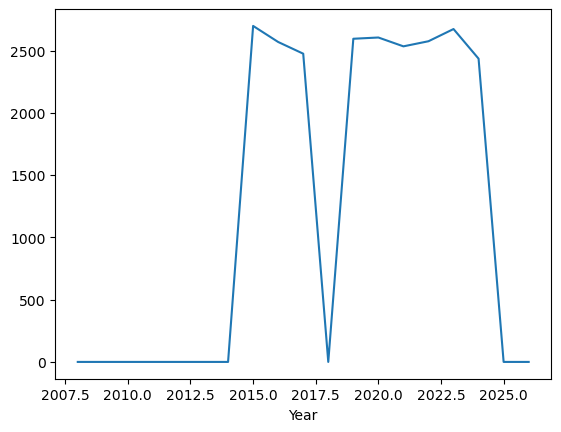

In [52]:
awards_wide_df.groupby('Year').MPSDirTotal.sum().plot()